In [1]:
#Ingestion

def leggi_file_txt(nome_file):
    out = []
    with open(nome_file, 'r') as file:
        for riga in file:
                out.append(list(riga[:-1]))
    return out

nome_file = 'input_day16.txt'
nome_file_test= 'input_day16_test.txt'
data= leggi_file_txt(nome_file)
data_test=leggi_file_txt(nome_file_test)

In [2]:
#Funzioni parte 1
import networkx as nx


def crea_grafo(lista):
    G = nx.DiGraph()
    punti_buoni=['.','S','E']
    for i in range(len(lista)):
        for j in range(len(lista[0])):
            if lista[i][j] in punti_buoni:
                G.add_node((i,j,'N'))
                G.add_node((i,j,'S'))
                G.add_node((i,j,'W'))
                G.add_node((i,j,'E'))
                G.add_edge((i,j,'N'), (i,j,'E'), weight=1000)
                G.add_edge((i,j,'N'), (i,j,'W'), weight=1000)
                G.add_edge((i,j,'S'), (i,j,'E'), weight=1000)
                G.add_edge((i,j,'S'), (i,j,'W'), weight=1000)
                G.add_edge((i,j,'W'), (i,j,'N'), weight=1000)
                G.add_edge((i,j,'W'), (i,j,'S'), weight=1000)
                G.add_edge((i,j,'E'), (i,j,'N'), weight=1000)
                G.add_edge((i,j,'E'), (i,j,'S'), weight=1000)
    for i in range(1,len(lista)-1):
        for j in range(1,len(lista[0])-1):
            if lista[i][j] in punti_buoni and lista[i][j+1] in punti_buoni:
                G.add_edge((i,j,'E'), (i,j+1,'E'), weight=1)
            if lista[i][j] in punti_buoni  and lista[i][j-1] in punti_buoni :
                G.add_edge((i,j,'W'), (i,j-1,'W'), weight=1)
            if lista[i][j] in punti_buoni  and lista[i+1][j] in punti_buoni :
                G.add_edge((i,j,'S'), (i+1,j,'S'), weight=1)
            if lista[i][j] in punti_buoni  and lista[i-1][j] in punti_buoni :
                G.add_edge((i,j,'N'), (i-1,j,'N'), weight=1)
    return G

def trova_inizio(lista):
    for i in range(len(lista)):
        for j in range(len(lista[0])):
            if lista[i][j]=='S':
                return (i,j,'E')
    return 0

def trova_fine(lista):
    for i in range(len(lista)):
        for j in range(len(lista[0])):
            if lista[i][j]=='E':
                return (i,j)
    return 0

def percorso_minimo(G, S, E):
    out=[]
    cardinali=['N', 'S', 'W', 'E']
    for direzione in cardinali:
        E_orientata=(E[0],E[1], direzione)
    out.append(nx.dijkstra_path_length(G,S,E_orientata, weight='weight'))
    return min(out)-1000


In [3]:
#Calcolo parte 1

answer_1=0
mappa=data_test

grafo=crea_grafo(mappa)

inizio=trova_inizio(mappa)
fine=trova_fine(mappa)

answer_1=percorso_minimo(grafo, inizio, fine)

print(answer_1)

11048


In [4]:
#Funzioni parte 2

import numpy as np
import matplotlib.pyplot as plt

def sedute(G, S, E):
    out=[]
    cardinali=['N', 'S', 'W', 'E']
    for direzione in cardinali:
        E_orientata=(E[0],E[1], direzione)
        out += list(nx.all_shortest_paths(G,S,E_orientata, weight='weight'))
    return out

def rimuovi_direzioni(lista):
    out=[]
    for path in lista:
        for item in path:
            out.append((item[0],item[1]))

    return set(out)

def trova_cancelletti(lista):
    out=[]
    for i in range(len(lista)):
        for j in range(len(lista)):
            if lista[i][j]=='#':
                out.append((i,j))
    return out

def disegna_circuito(size, cancelletti, tondi):
    circuito=np.zeros((size,size))
    for cancelletto in cancelletti:
        circuito[cancelletto[1]][cancelletto[0]]+=10
    for tondo in tondi:
        circuito[tondo[1]][tondo[0]]-=10
    plt.imshow(np.transpose(circuito))




524


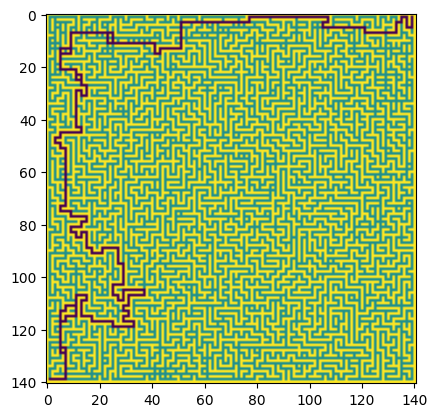

In [5]:
#Calcolo parte 2

answer_2=0
mappa=data
size=len(mappa)



grafo=crea_grafo(mappa)
inizio=trova_inizio(mappa)
fine=trova_fine(mappa)

posti=rimuovi_direzioni(sedute(grafo,inizio, fine))
ostruzioni=trova_cancelletti(mappa)

#disegna_circuito(size, ostruzioni, posti)


answer_2=len(posti)
print(answer_2)